### State Schema with DataClass

In the 1_simple_graph.ipynb we saw StateSchema class inheriting TypedDict

```
from typing import TypedDict

class State(TypedDict):
    graph_info: str
```

We know that this class has `graph_info: str` a variable with type hint, but TypeDict will not enforce this. But it is a suggestion only.

If we need to enforce the type - we need to use *DataClasses*

In [1]:
from langgraph.graph import StateGraph, START, END
from dataclasses import dataclass
from typing import TypedDict, Literal
import random

In [3]:
@dataclass
class DataClassState():
    name: str
    game: str

In [8]:
def start_play_node(state: DataClassState) -> DataClassState:
    print("Start play was called")

    return {"name": state.name + " I will start the play now!"}

def play_cricket_node(state: DataClassState) -> DataClassState:
    print("Play cricket was called")

    return {"game": "cricket"}

def play_football_node(state: DataClassState) -> DataClassState:
    print("Play football was called")

    return {"game": "football"}

In [9]:
def random_play(state: DataClassState) -> Literal["play_cricket", "play_badminton"]:
    if random.random() > 0.5:
        return "play_cricket"
    else:
        return "play_badminton"

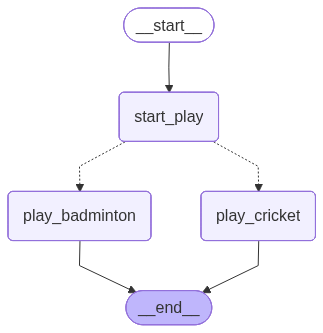

In [10]:
# define the graph
graph = StateGraph(DataClassState)

# add nodes
graph.add_node("start_play", start_play_node)
graph.add_node("play_cricket", play_cricket_node)
graph.add_node("play_badminton", play_football_node)

# add edges
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("play_cricket", END)
graph.add_edge("play_badminton", END)

# compile the graph
workflow = graph.compile()

workflow


In [ ]:
# initial_state = {"name": "Srini"} # this we cannot do as the state is a dataclass

# all the fields are required in the dataclass
initial_state = DataClassState(name="Srini", game="") 
final_state = workflow.invoke(initial_state)

final_state

Start play was called
Play cricket was called


{'name': 'Srini I will start the play now!', 'game': 'cricket'}

In [12]:
initial_state = DataClassState(name=233, game="") 
final_state = workflow.invoke(initial_state)

final_state

Start play was called


TypeError: unsupported operand type(s) for +: 'int' and 'str'